In [1]:
#!pip install scikit-learn matplotlib numpy pandas seaborn
#%pip install pandas

# EDA Part


## Import libraries

In [28]:
import sys
sys.path.append('../')
from pipelines.images_to_df import images_to_df
from pipelines.create_image_pipeline import create_image_pipeline
from skimage.io import imread_collection
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from skimage.io import imread
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

In [4]:
# #write me a ptyhon script which for items in a folder gets 10% sample and saves that in different folder

# import os
# import random
# import shutil

# random.seed(42)

# # Define the source and destination directories
# src_dir = "../data/train/PNEUMONIA"
# dst_dir = "../data/train/PNEUMONIA/to_model"

# # Get a list of all files in the source directory
# files = os.listdir(src_dir)

# # Take a 10% sample of the files
# sample_files = random.sample(files, int(len(files) * 0.1))

# # Copy the sample files to the destination directory
# for file_name in sample_files:
#     shutil.copy(os.path.join(src_dir, file_name), dst_dir)

In [29]:
images_0 = imread_collection('../data/train/NORMAL/to_model/*.jpeg')
images_1 = imread_collection('../data/train/PNEUMONIA/to_model/*.jpeg')



## Importing images from pipelines

In [32]:
# df_0=images_to_df(images_0,type=0)
# df_1=images_to_df(images_1,type=1)

#df_0=create_image_pipeline(images_0,type=0)
df_1=create_image_pipeline(images_1,type=0)



ValueError: too many values to unpack (expected 2)

In [5]:
df_0.head()

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.000034,9.179144e-07,2.982788e-07,0.000001,3.022686e-07,0.000002,0.000004,0.000012,0.000019,0.000037,...,2.440431e-07,5.290151e-07,5.218733e-06,3.207140e-07,0.000000,2.021611e-10,2.389869e-07,0.000011,0.000017,0.0
1,0.001496,1.485560e-03,1.538282e-03,0.001589,1.595790e-03,0.001589,0.001645,0.001661,0.001663,0.001678,...,8.347297e-11,1.334495e-08,7.669873e-08,3.709981e-06,0.000003,1.241676e-06,4.212195e-08,0.000004,0.000008,0.0
2,0.001000,1.328269e-03,1.340265e-03,0.001355,1.576930e-03,0.001648,0.001570,0.001505,0.001611,0.001699,...,3.713338e-04,3.677337e-04,3.639309e-04,3.322092e-04,0.000337,3.776639e-04,3.903970e-04,0.000362,0.000353,0.0
3,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0
4,0.001683,1.677793e-03,1.766692e-03,0.001859,2.157460e-03,0.002450,0.002696,0.002819,0.002936,0.002988,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0


In [ ]:
#merge df_0 and df_1
df=pd.concat([df_0,df_1],ignore_index=False)
#shuffle rows in df
df=df.sample(frac=1).reset_index(drop=True)
df_labels=df['label'].copy()
df=df.drop(columns=['label'])

print(df.sample(5))
df.size

       0         1         2         3         4         5         6        
52   0.072984  0.068504  0.076974  0.075095  0.075162  0.072178  0.067069  \
565  0.098476  0.098495  0.116853  0.107801  0.101175  0.138628  0.107422   
172  0.005670  0.013961  0.009541  0.004939  0.003481  0.003321  0.002904   
325  0.117500  0.117500  0.117500  0.117500  0.117500  0.117500  0.117500   
246  0.180172  0.189525  0.173116  0.193316  0.196896  0.194337  0.216595   

       7         8         9       ...    262134    262135    262136   
52   0.073259  0.072500  0.079414  ...  0.078670  0.076184  0.076088  \
565  0.108718  0.095511  0.104194  ...  0.885122  0.874035  0.873697   
172  0.002809  0.002497  0.001536  ...  0.436119  0.358401  0.419818   
325  0.117500  0.117500  0.117500  ...  0.117500  0.117500  0.117500   
246  0.180754  0.182021  0.218975  ...  0.553091  0.572382  0.577442   

       262137    262138    262139    262140    262141    262142    262143  
52   0.079361  0.079398  0.0

163577856

## Dimensional reduction

### PCA Visualisation

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)

# Create DataFrame for visualization
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Label'] = df_labels.values.flatten()  # Extracting the labels column and flattening to 1D array

print(pca_df.sample(5))


           PC1        PC2  Label
360  50.417632  48.111954      0
324 -52.749767 -24.615204      1
200 -57.776618  -2.011764      1
353  30.685328 -27.001984      0
471  18.447474 -24.284496      1


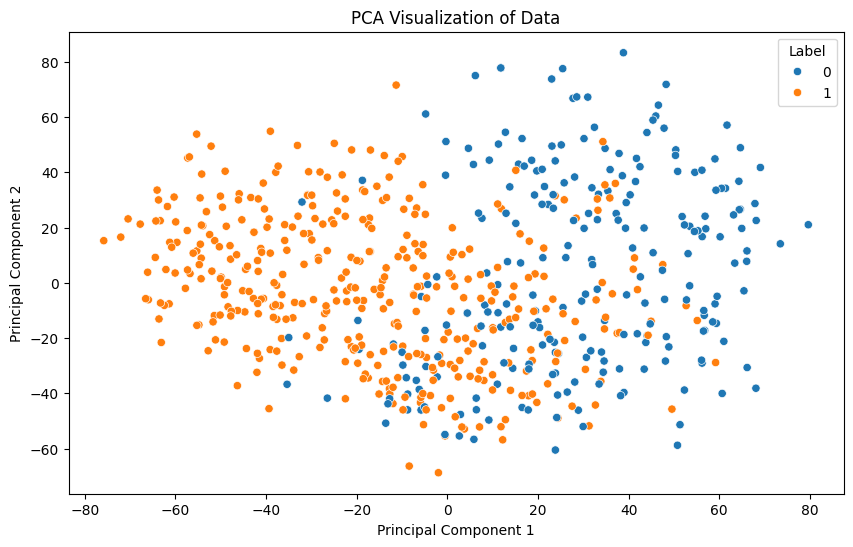

In [ ]:
# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Label', data=pca_df)
plt.title('PCA Visualization of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Label', loc='upper right')
plt.show()

In [ ]:
#for pca I also want to see the explained variance ratio
print(pca.explained_variance_ratio_)

[0.13020969 0.09504632]


### t-SNE Visualisation

In [ ]:
#now t-sne visualization
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(df)

# Create DataFrame for visualization
tsne_df = pd.DataFrame(data=tsne_components, columns=['TSNE_1', 'TSNE_2'])

#add df_label to that
tsne_df['Label'] = df_labels.values.flatten()

tsne_df.sample(5)


,TSNE_1,TSNE_2,Label
189,-6.186346,12.740008,1
245,2.081542,18.005655,1
233,0.473627,-18.350321,0
167,-3.003539,17.661255,1
356,0.408984,-24.309320,1


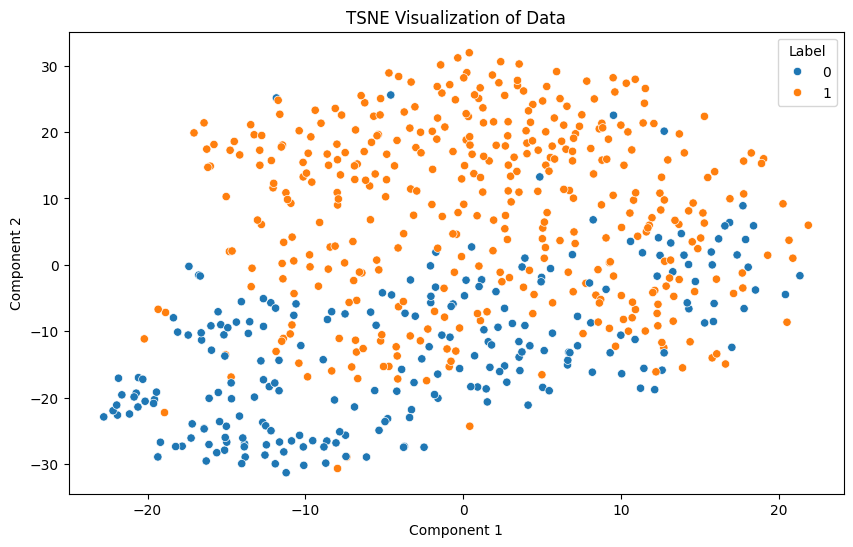

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE_1', y='TSNE_2', hue='Label', data=tsne_df)
plt.title('TSNE Visualization of Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Label', loc='upper right')
plt.show()

## Computer Vision filters

### Histogram of Oriented Gradients

58


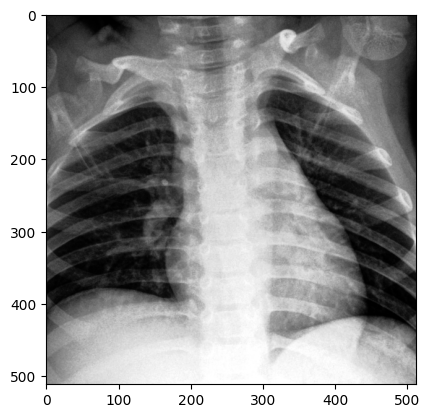

In [ ]:
index_0=random.randint(0,df.shape[0]-1)
print(index_0)

image = df.iloc[index_0]
# image
image_matrix = np.array(image).reshape(512, 512)
#second column of image to numpy array and resize it to 128x128
image_matrix.shape
#show me this image
# plt.imshow(image, cmap='gray')
# image.shape

#visualise me image_matrix which 128x128 and has values from 0 to 255
plt.imshow(image_matrix, cmap='gray')

image=image_matrix


In [ ]:
# Calculate HOG features
features, hog_image = hog(image, orientations=10, pixels_per_cell=(4, 4),
                          cells_per_block=(1, 1), visualize=True)
# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 50))
#print me the image


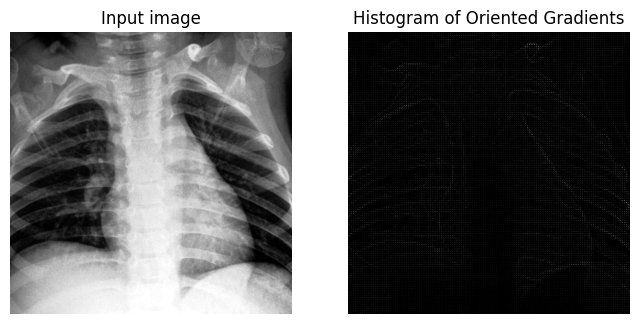

In [ ]:
# Plot original and HOG image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

### Local Binary Patterns

/home/iwaniukooo/.local/lib/python3.10/site-packages/skimage/feature/texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


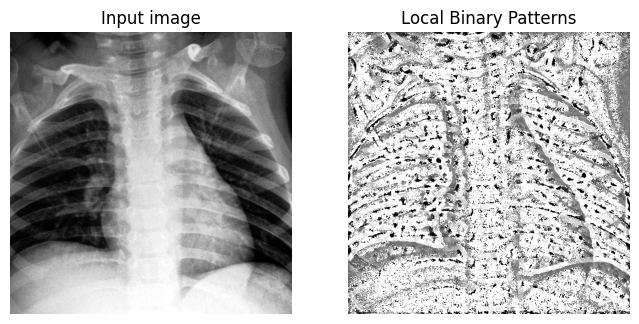

In [ ]:
from skimage import feature
import numpy as np

# Set the number of points and radius for LBP
points = 24
radius = 8

# Compute LBP features
lbp = feature.local_binary_pattern(image, points, radius, method="uniform")

# Normalize the histogram
(hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, points + 3), range=(0, points + 2))
hist = hist.astype("float")
hist /= (hist.sum() + 1e-7)

# Plot the original image and LBP
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.axis('off')
ax2.imshow(lbp, cmap=plt.cm.gray)
ax2.set_title('Local Binary Patterns')
plt.show()

In [ ]:
# %pip install opencv-python

### Color histogram
(not really helpful)

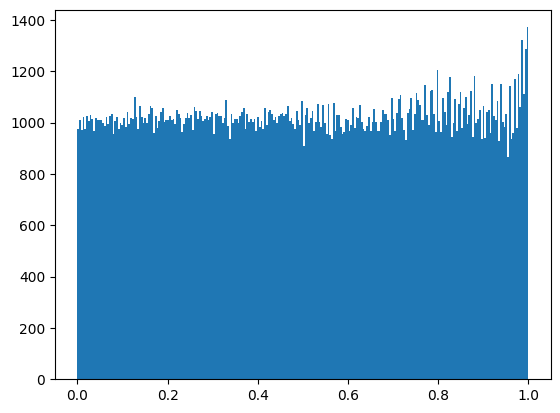

In [ ]:
plt.hist(image.ravel(), bins=256)
plt.show()

### Thresholding

#### OTSU thresholding 

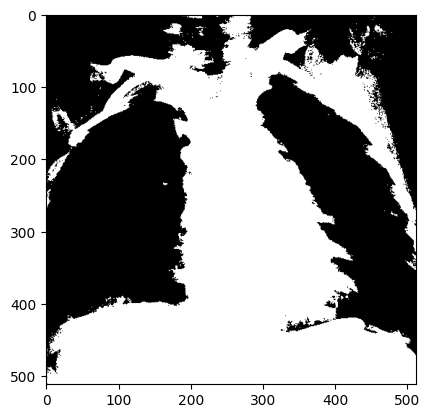

In [ ]:
from skimage.filters import threshold_otsu


thresh = threshold_otsu(image)

binary = image > thresh

plt.imshow(binary, cmap='gray')

#### Contours detecting

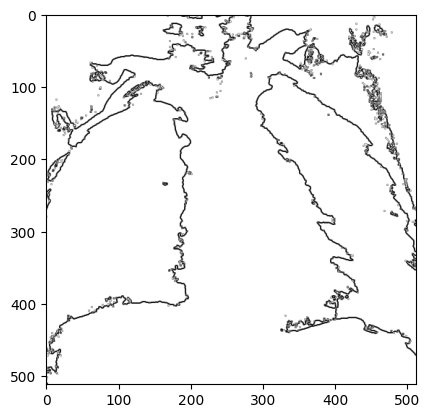

In [ ]:
#sisnce eveyrhing is 0/1 i want everything to be white + original contours as a black line
# plt.imshow(binary, cmap='gray')
#rortate upside down binary



# plt.contour(np.flipud(binary), colors='black', linewidths=1)
# plt.axis('off')
from skimage.filters import sobel
from skimage.filters import gaussian

# gaussian_image = image
# gaussian_image = gaussian(binary, sigma=2)


edge_sobel = sobel(binary)
edge_sobel = 1 - edge_sobel

plt.imshow(edge_sobel, cmap='gray')
# plt.imshow(gaussian_image, cmap='gray') 


#idea - prepare PCA and TSNE on countours??

#### Local thresholding

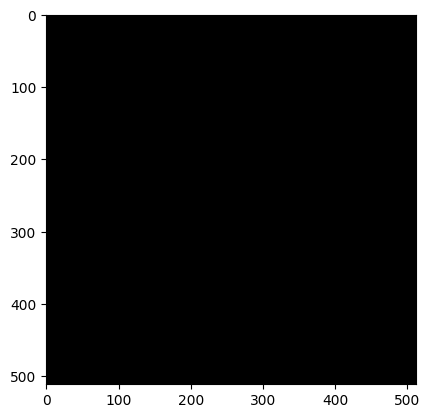

In [ ]:
from skimage.filters import threshold_local

block_size=35

local_thresh = threshold_local(image, block_size, offset=10)

binary_local = image > local_thresh

plt.imshow(binary_local, cmap='gray')

#### Try all thresholds


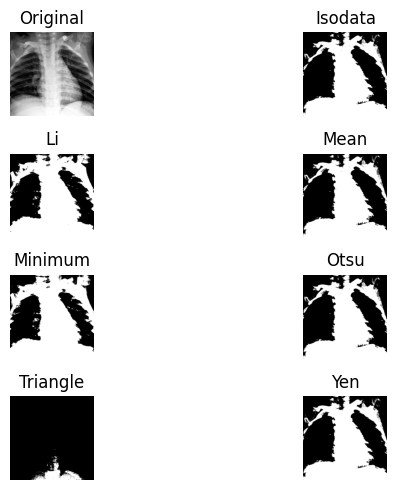

In [ ]:
from skimage.filters import try_all_threshold

fig, ax = try_all_threshold(image,  verbose=False)

plt.show()

In [ ]:
images_0_test = imread_collection('../data/test/NORMAL/*.jpeg')
images_1_test = imread_collection('../data/test/PNEUMONIA/*.jpeg')

# df_0=images_to_df(images_0,type=0)
# df_1=images_to_df(images_1,type=1)

df_0_test=create_image_pipeline(images_0_test,type=0)
df_1_test=create_image_pipeline(images_1_test,type=1)



In [ ]:
#basing on df_0 and df_1 I want to create a model that will predict if the image is pneumonia or not. In order to do that, prepare automl library. df_0 and df_1 are already prepared for you as a atraining, tests are df_0_test and df_1_test. Prepare a model that will predict if the image is pneumonia or not.

from pycaret.classification import *

df_train = pd.concat([df_0, df_1])
df_train['target'] = [0]*len(df_0) + [1]*len(df_1)

clf = setup(data = df_train, target = 'target')

compare_models()










